# Discrete Time Fourier Transform (DTFT)



### Q1. Compute the DTFT (magnitude and phase) of the following (use <i>scipy.signal.freqz</i>). Plot from $\omega = −2\pi$ to $2\pi$. Observe the symmetries and relations between the spectra.

https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.signal.freqz.html
 <ol>
  <li>$r[n] = u[n] − u[n − 5]$  </li>
 <li>$r[n − 7]$  </li>
  <li>$r[n + 4]$ </li>
    <li>$r[−n]$ </li>
    <li>$(−1)^nr[n]$ </li>
</ol>



#### Inference 

##### What is the period of the DTFT ?

##### There are two different discontinuities in the phase spectrum.  Identify and explain why it is happeneing? 

### CODE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

In [2]:
N = 4096
omega = 2 * np.pi
n = 15
x = np.arange(-n, n + 1)
x

array([-15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,
        -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        11,  12,  13,  14,  15])

1) $r[n] = u[n] − u[n − 5]$

In [3]:
n0 = 0

<StemContainer object of 3 artists>

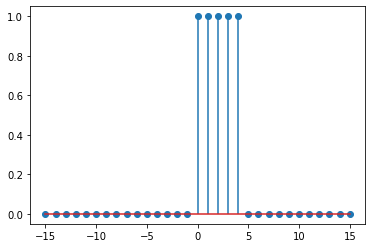

In [4]:
r = np.zeros(x.size)
r[n + n0:n + n0 + 5] = 1
plt.stem(x, r)

In [5]:
a = np.ones(1)
b = r[n:]
a, b

(array([1.]),
 array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [6]:
def plot(r, a, b):
    c = c = np.arange(-omega, omega, 2 * omega / N)
    w1, h1 = sig.freqz(b, a, c)
    #     magnitude
    h1db = 20 * np.log10(abs(h1))
    plt.plot(w1 / (2 * np.pi), h1db)
    plt.show()
    #     phase
    angles = np.angle(h1, deg=True)
    plt.plot(w1 / (2 * np.pi), angles, 'g')
    plt.show()

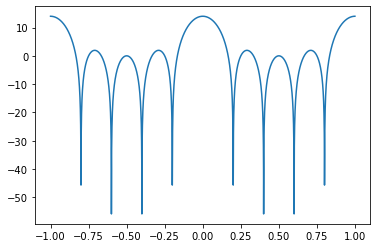

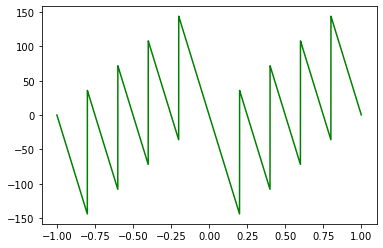

In [7]:
plot(r, a, b)

2) $r[n − 7]$ 

In [8]:
n0 = 7

<StemContainer object of 3 artists>

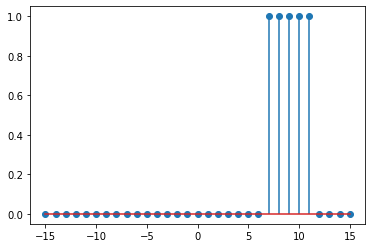

In [9]:
r = np.zeros(x.size)
r[n + n0:n + n0 + 5] = 1
plt.stem(x, r)

In [10]:
a = np.ones(1)
b = r[n:]
a, b

(array([1.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.]))

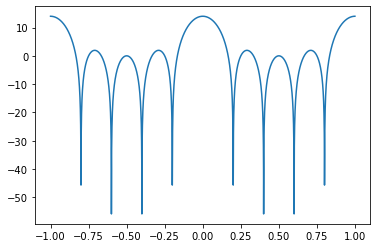

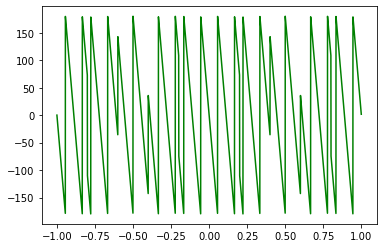

In [11]:
plot(r, a, b)

3) $r[n + 4]$ 

In [12]:
n0 = -4

<StemContainer object of 3 artists>

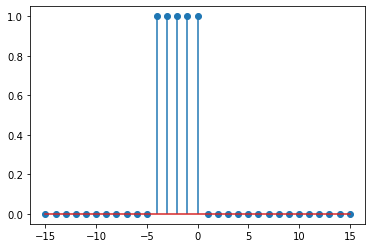

In [13]:
r = np.zeros(x.size)
r[n + n0:n + n0 + 5] = 1
plt.stem(x, r)

In [14]:
a = np.zeros(5)
a[4] = 1
b = np.ones(5)
a, b

(array([0., 0., 0., 0., 1.]), array([1., 1., 1., 1., 1.]))

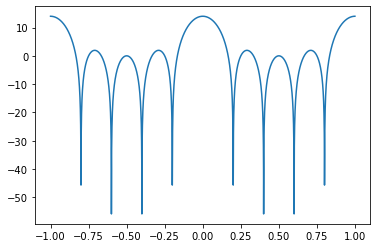

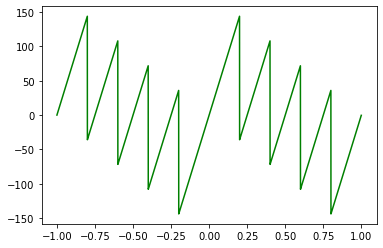

In [15]:
plot(r, a, b)

4) $r[−n]$

In [16]:
n0 = 0

<StemContainer object of 3 artists>

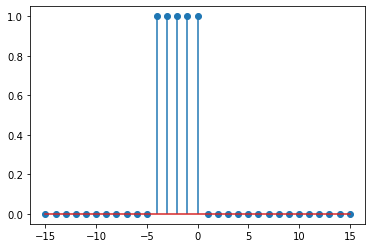

In [17]:
r = np.zeros(x.size)
r[n + n0:n + n0 + 5] = 1
r = r[::-1]
plt.stem(x, r)

In [18]:
a = np.zeros(5)
a[4] = 1
b = np.ones(5)
a, b

(array([0., 0., 0., 0., 1.]), array([1., 1., 1., 1., 1.]))

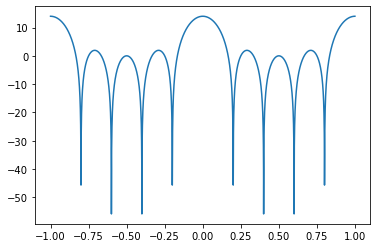

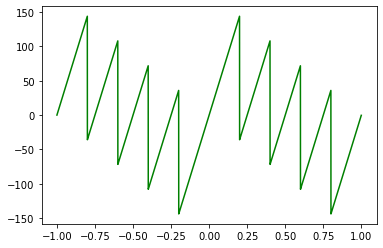

In [19]:
plot(r, a, b)

5) $(−1)^nr[n]$ 

In [20]:
n0 = 0

<StemContainer object of 3 artists>

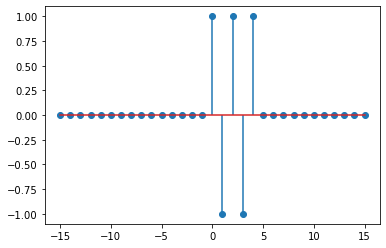

In [21]:
r = np.zeros(x.size)
r[n + n0:n + n0 + 5] = 1
r[x % 2 == 1] *= -1
plt.stem(x, r)

In [22]:
a = np.ones(1)
b = r[n:]
a, b

(array([1.]),
 array([ 1., -1.,  1., -1.,  1., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,
        -0.,  0., -0.]))

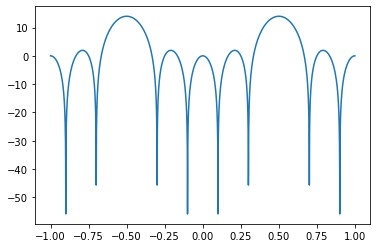

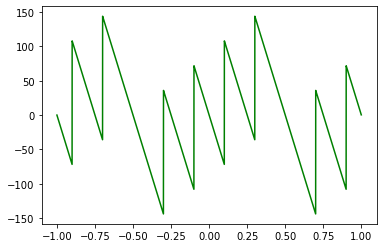

In [23]:
plot(r, a, b)

Q2. Consider the sinusoid $s[n] = (A cos(\omega_0n +\phi))$ where A = 2; $\omega_0 = \pi/4$; $ \phi = \pi/6$. Compute and plot the DTFT from $[−\pi~,~+\pi]$. Use samples from a
finite time window
<ol>
  <li>$n = [0, 21]$  </li>
 <li>$n = [0, 201]$  </li>  
</ol> Observe and compare
the spectrum in both cases.

<i>Note: While plotting the spectrum please obtain lot of points (eg. 4096) so that the details are not lost.</i>

In [24]:
N = 4096
omega = np.pi
w = np.pi / 4
A = 2
phi = np.pi / 6
n = 21
x = np.arange(n + 1)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [25]:
s = A * np.cos(w * x + phi)
s

array([ 1.73205081,  0.51763809, -1.        , -1.93185165, -1.73205081,
       -0.51763809,  1.        ,  1.93185165,  1.73205081,  0.51763809,
       -1.        , -1.93185165, -1.73205081, -0.51763809,  1.        ,
        1.93185165,  1.73205081,  0.51763809, -1.        , -1.93185165,
       -1.73205081, -0.51763809])

<StemContainer object of 3 artists>

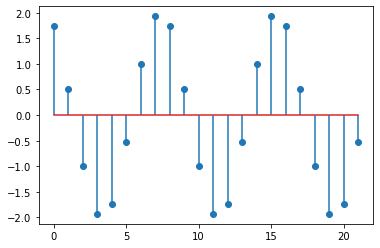

In [26]:
plt.stem(x, s)

In [27]:
def plot(s):
    a = np.ones(1)
    b = s
    c = c = np.arange(-omega, omega, 2 * omega / N)
    w1, h1 = sig.freqz(b, a, c)
    #     magnitude
    h1db = 20 * np.log10(abs(h1))
    plt.plot(w1 / (2 * np.pi), h1db)
    plt.show()
    #     phase
    angles = np.angle(h1, deg=True)
    plt.plot(w1 / (2 * np.pi), angles, 'g')
    plt.show()

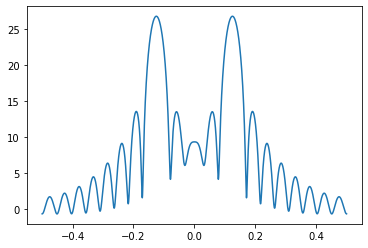

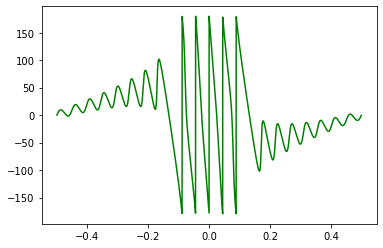

In [28]:
plot(s)

In [29]:
n = 201
x = np.arange(n + 1)
s = A * np.cos(w * x + phi)

<StemContainer object of 3 artists>

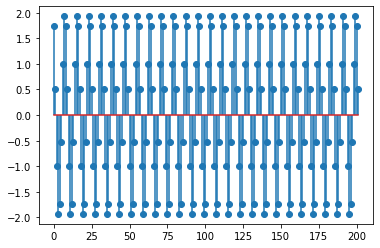

In [30]:
plt.stem(x, s)

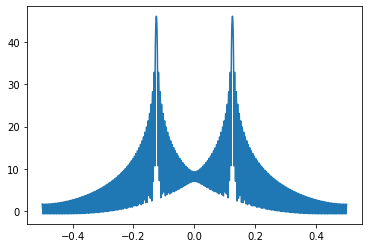

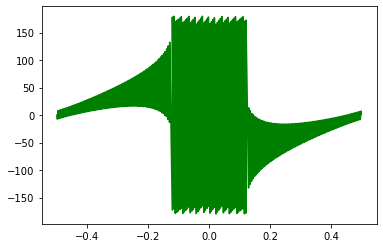

In [31]:
plot(s)

Q3. Consider a signal $x[n] ~ =~u[n]-u[n-6]$. Plot the DTFT of the signal $X(e^{j\omega})$ in $[-\pi ~~+\pi]$. Consider an expanded version of the signal

$ z[n]= \begin{cases}x[\frac{n}{2}]~~,~~~n~~even\\0~~,~~~~n~~~odd\end{cases}$
 
Plot $Z(e^{j\omega})$(magnitude and phase separately). What is the periodicity of the DTFT? Observe the effect     of expanding time axis in the frequency domain. 


In [32]:
N = 4096
omega = np.pi
n = np.arange(10 + 1)
x = np.zeros(n.size)
x[0:6] = 1

In [33]:
def plot(r):
    a = np.ones(1)
    b = r
    c = c = np.arange(-omega, omega, 2 * omega / N)
    w1, h1 = sig.freqz(b, a, c)
    #     magnitude
    h1db = 20 * np.log10(abs(h1))
    plt.plot(w1 / (2 * np.pi), h1db)
    plt.show()
    #     phase
    angles = np.angle(h1, deg=True)
    plt.plot(w1 / (2 * np.pi), angles, 'g')
    plt.show()

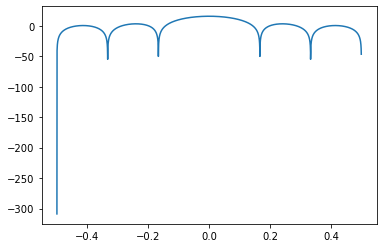

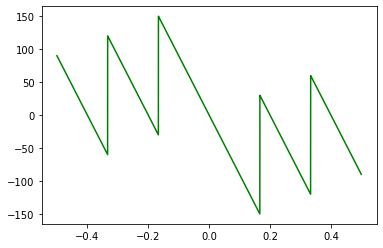

In [34]:
plot(x)

In [35]:
z = np.array([0 if i & 1 else x[int(i / 2)] for i in n])
z

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.])

<StemContainer object of 3 artists>

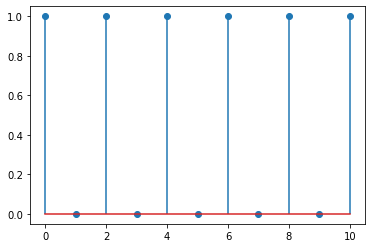

In [36]:
plt.stem(n, z)

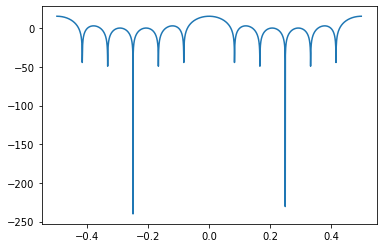

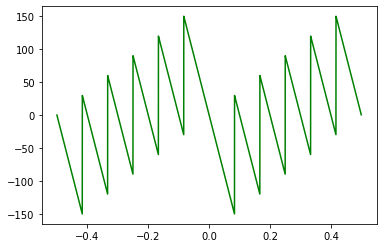

In [37]:
plot(z)

1) $r[n] = u[n] − u[n − 5]$

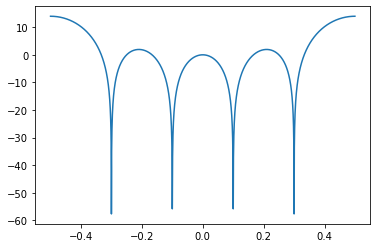

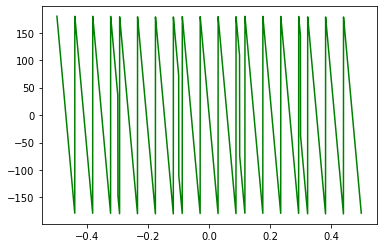

In [38]:
plot(r)

Q4. Consider the signals $x[n] = n(u[n]- u[n-4])$ and $y[n] = 0.9^n(u[n] - u[n-10])$. Find the convolution $z[n] = x[n] * y[n]$ of the signals. Plot $X(e^{j\omega})$, $Y(e^{j\omega})$ and $Z(e^{j\omega})$ (magnitude and phase separately).  


In [39]:
N = 4096
omega = np.pi
n = np.arange(15)


def plot(r):
    a = np.ones(1)
    b = r
    c = c = np.arange(-omega, omega, 2 * omega / N)
    w1, h1 = sig.freqz(b, a, c)
    #     magnitude
    h1db = 20 * np.log10(abs(h1))
    plt.plot(w1 / omega, h1db)
    plt.show()
    #     phase
    angles = np.angle(h1, deg=True)
    plt.plot(w1 / omega, angles, 'g')
    plt.show()

<StemContainer object of 3 artists>

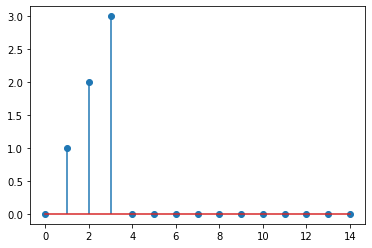

In [40]:
x = np.zeros(n.size)
x[0:4] = 1
x = n * x
plt.stem(n, x)

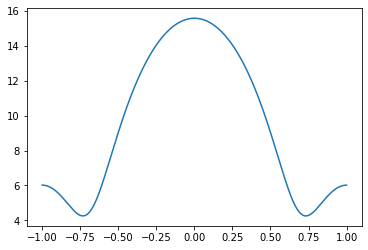

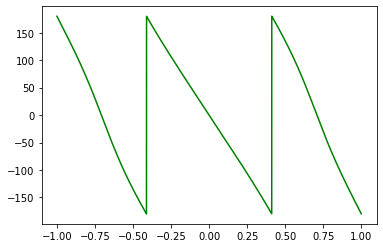

In [41]:
plot(x)

<StemContainer object of 3 artists>

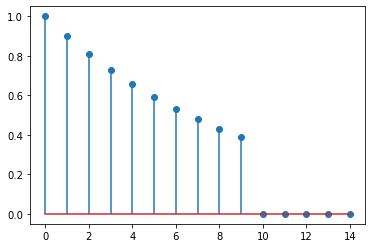

In [42]:
y = np.zeros(n.size)
y[0:10] = 1
y = np.power(.9, n) * y
plt.stem(n, y)

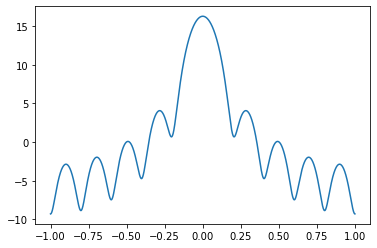

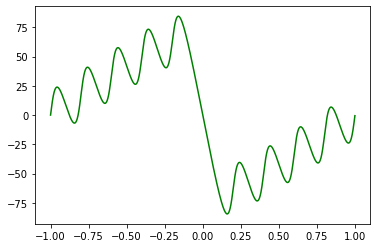

In [43]:
plot(y)

<StemContainer object of 3 artists>

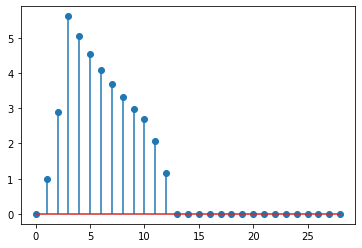

In [44]:
z = sig.convolve(x, y)
n2 = np.arange(2 * n[0], 2 * n[-1] + 1)
plt.stem(n2, z)

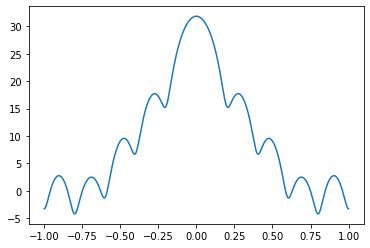

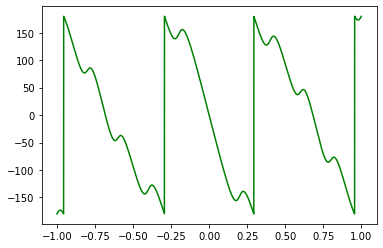

In [45]:
plot(z)

Q5. Find the DTFT of the given speech signals that corresponds to two vowels (/a/ and /i/). Which vowel has more high frequency content? 


In [46]:
import scipy.io.wavfile as wav

In [47]:
rate_a, data_a = wav.read('a.wav')
rate_a, data_a

C:\Users\inba2\AppData\Local\Temp/ipykernel_6012/969112589.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate_a, data_a = wav.read('a.wav')


(44100, array([ 39,  47,  24, ..., -48, -48, -29], dtype=int16))

In [48]:
rate_i, data_i = wav.read('i.wav')
rate_i, data_i

C:\Users\inba2\AppData\Local\Temp/ipykernel_6012/1455057468.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate_i, data_i = wav.read('i.wav')


(44100, array([ -2,  16,  42, ..., -16, -22,  -4], dtype=int16))

In [49]:
N = 1024
omega = np.pi


def plot(r):
    a = np.ones(1)
    b = r
    c = c = np.arange(-omega, omega, 2 * omega / N)
    w1, h1 = sig.freqz(b, a, c)
    #     magnitude
    h1db = 20 * np.log10(abs(h1))
    plt.plot(w1 / omega, h1db)
    plt.show()
    #     phase
    angles = np.angle(h1, deg=True)
    plt.plot(w1 / omega, angles, 'g')
    plt.show()

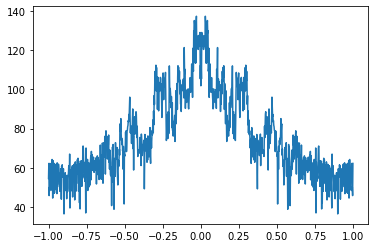

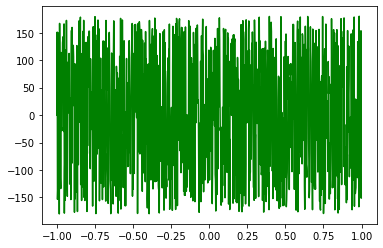

In [50]:
plot(data_a)

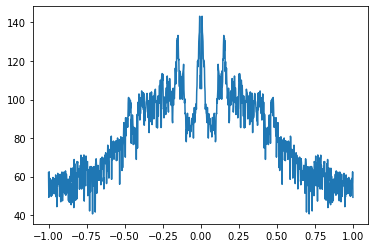

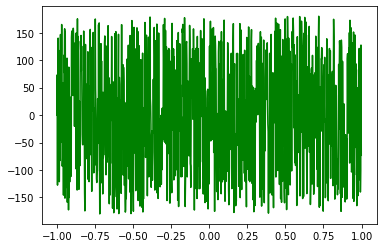

In [51]:
plot(data_i)